# Assignment 1: assess_portfolio

## Overview

A ''portfolio'' is a collection of stocks (or other assets) and corresponding allocations of funds to each of them. In order to evaluate and compare different portfolios, we first need to compute certain metrics, based on available historical data.

The primary goal of this assignment is to introduce you to this form of portfolio analysis. You will use [[pandas]] for reading in data, calculating various statistics and plotting a comparison graph.

## Task

First, if you haven't yet set up your software environment, follow the instructions here: [[ML4T_Software_Setup]].  Now, for this assignment: Create a function called <tt>assess_portfolio()</tt> that takes as input a description of a portfolio and computes important statistics about it.  

You are given the following inputs for analyzing a portfolio:
* A date range to select the historical data to use (specified by a start and end date).  You should consider performance from close of the start date to close of the end date.
* Symbols for equities (e.g., GOOG, AAPL, GLD, XOM). Note: You should support any symbol in the data directory.
* Allocations to the equities at the beginning of the simulation (e.g., 0.2, 0.3, 0.4, 0.1), should sum to 1.0.
* Total starting value of the portfolio (e.g. $1,000,000)

Your goal is to compute the daily portfolio value over given date range, and then the following statistics for the overall portfolio:
* Cumulative return
* Average period return (if sampling frequency == 252 then this is average daily return)
* Standard deviation of daily returns
* Sharpe ratio of the overall portfolio, given daily risk free rate (usually 0), and yearly sampling frequency (usually 252, the no. of trading days in a year)
* Ending value of the portfolio

## API specification

For grading purposes, we will test ONLY <tt>assess_portfolio()</tt> the function that computes statistics.  You should implement the following API EXACTLY, if you do not, your submission will be penalized at least 20 points.

<PRE>
import datetime as dt
cr, adr, sddr, sr, ev = \
    assess_portfolio(sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,1,1), \
    syms=['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False)
</PRE>

Where the returned outputs are:
* cr: Cumulative return
* adr: Average period return (if sf == 252 this is daily return)
* sddr: Standard deviation of daily return
* sr: Sharpe ratio
* ev: End value of portfolio

The input parameters are:
* sd: A datetime object that represents the start date
* ed: A datetime object that represents the end date
* syms: A list of 2 or more symbols that make up the portfolio (note that your code should support any symbol in the data directory)
* allocs: A list of 2 or more allocations to the stocks, must sum to 1.0
* sv: Start value of the portfolio
* rfr: The risk free return per sample period that does not change for the entire date range (a single number, not an array).
* sf: Sampling frequency per year
* gen_plot: If False, do not create any output.  If True it is OK to output a plot such as <tt>plot.png</tt>

## Template

A template is provided for you to get started with the project.  You will find it in the appropriate subdirectory that you checked out from github.

You should see the following directory structure:
* <tt>ml4t/</tt>: Root directory for course
** <tt>data/</tt>: Location of data
** <tt>assess_portfolio/</tt>: Root directory for this project
*** <tt>analysis.py</tt>: Main project script with functions you need to implement, as well as test code
*** <tt>output/</tt>: Directory to store all program outputs, including plots
*** <tt>util.py</tt>: Utility functions (do not modify these, unless instructed)

You should change ONLY <tt>analysis.py</tt>.  ALL of your code should be in that one file.  Do not create additional files.  It should always remain in and run from the directory <tt>ml4t/assess_portfolio/</tt>.  If you move it somewhere else and develop your code there, it may not run properly when auto graded.

Notes:

* Ignore any file named <tt>__init__.py</tt>; they are used to mark directories as Python packages.
* We assume your <tt>data/</tt> directory is one level up, (i.e., ../data/).  That directory should contain all stock data, in CSV files (e.g. <tt>GOOG.csv</tt>, <tt>AAPL.csv</tt>, etc.)
* To execute the main script, make sure your current working directory is <tt>assess_portfolio/</tt>, then run:
<pre>python analysis.py</pre>

## Suggestions

Here is a suggested high-level outline for what your code needs to do:
*Read in adjusted closing prices for the equities.
*Normalize the prices according to the first day. The first row for each stock should have a value of 1.0 at this point.
*Multiply each column by the allocation to the corresponding equity.
*Multiply these normalized allocations by starting value of overall portfolio, to get position values.
*Sum each row (i.e. all position values for each day). That is your daily portfolio value.
*Compute statistics from the total portfolio value.

You will need to reuse some of your code from this project for the next project.  To make that task easier, we suggest that you create a helper function within your code that has the following prototype.  Note that we will not be testing this part of your code directly, so it isn't essential that you follow the API exactly.

<PRE>
cr, adr, sddr, sr = \
    compute_portfolio_stats(prices = df_prices, \
    allocs=[0.1,0.2,0.3,0.4],\
    rfr = 0.0, sf = 252.0)
</PRE>

Where the returned outputs are:
* cr: Cumulative return
* adr: Average daily return
* sddr: Standard deviation of daily return
* sr: Sharpe Ratio

The input parameters are:
* prices is a data frame or an ndarray of historical prices.
* allocs: A list of allocations to the stocks, must sum to 1.0
* rfr: The risk free return per sample period for the entire date range.  We assume that it does not change.
* sf: Sampling frequency per year

Here are some notes and assumptions:
*When we compute statistics on the portfolio value, we do not include the first day.
*We assume you are using the data provided. If you use other data your results may turn out different from ours. Yahoo's online data changes every day. We cannot not build a consistent "correct" answer based on "live" Yahoo data.
*Assume 252 trading days/year.

Make sure your <tt>assess_portfolio()</tt> function gives correct output. Check it against the examples below.

##Example output

These are actual correct examples that you can use to check your work.

### Example 1
<pre>
Start Date: 2010-01-01
End Date: 2010-12-31
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.51819243641
Volatility (stdev of daily returns): 0.0100104028
Average Daily Return: 0.000957366234238
Cumulative Return: 0.255646784534
</pre>

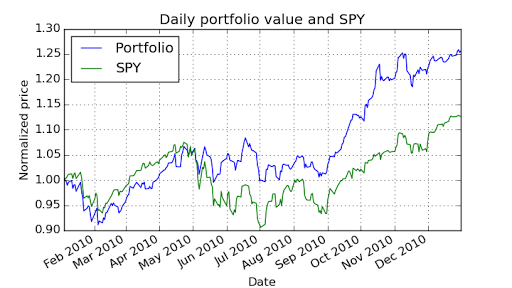

### Example 2
<pre>
Start Date: 2010-01-01
End Date: 2010-12-31
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [0.0, 0.0, 0.0, 1.0]
Sharpe Ratio: 1.30798398744
Volatility (stdev of daily returns): 0.00926153128768
Average Daily Return: 0.000763106152672
Cumulative Return: 0.198105963655
</pre>

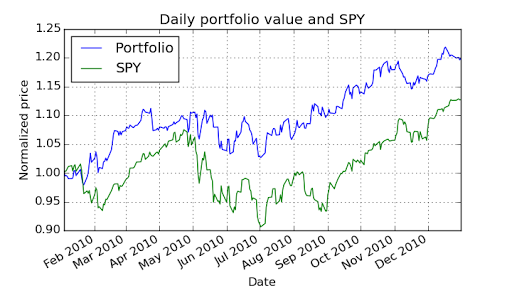

### Example 3
<PRE>
Start Date: 2010-06-01
End Date: 2010-12-31
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.21259766672
Volatility (stdev of daily returns): 0.00929734619707
Average Daily Return: 0.00129586924366
Cumulative Return: 0.205113938792
</PRE>

## What to turn in

''Be sure to follow these instructions diligently!''

Submit via T-Square as attachments only (no zip files please):
* Your code as <tt>analysis.py</tt> (please use this EXACT filename)

Important: We may test against OTHER symbols and other allocations, so don't hardcode the list of symbols.

Unlimited resubmissions are allowed up to the deadline for the project.

## Rubric

10 test cases: We will test your code against 10 cases (10 points per case).  Each case will be deemed "correct" if:
* 5 points: Sharpe ratio = reference answer +- 0.001
* 2.5 points: Average daily return = reference answer +- 0.00001
* 2.5 points: Cumulative return = reference answer +- 0.001

## Required, Allowed & Prohibited

Required:
* Your project must be coded in Python 2.7.x.
* Your code must run on one of the university-provided computers (e.g. buffet02.cc.gatech.edu).
* Use the code for reading in historical data provided in util.py
* Your code must run in less than 5 seconds on one of the university-provided computers.

Allowed:
* You can develop your code on your personal machine, but it must also run successfully on one of the university provided machines or virtual images.
* Your code may use standard Python libraries (except os).
* You may use the NumPy, SciPy, matplotlib and Pandas libraries.  Be sure you are using the correct versions.
* You may reuse sections of code (up to 5 lines) that you collected from other students or the internet.
* Code provided by the instructor, or allowed by the instructor to be shared.

Prohibited:
* Any use of global variables.
* Any libraries not listed in the "allowed" section above.
* Use of any code other than util.py to read in data.
* Use of Python's os module.
* Any code you did not write yourself (except for the 5 line rule in the "allowed" section).
* Knights who say "neeee."

## Legacy versions

* [[MC1-Project-1]]
* [[MC1-Project-1-legacy]]
* [[MC1-Project-1-archive]]


In [1]:
PortfolioTestCase(
        inputs=dict(
            start_date='2010-01-01',
            end_date='2010-12-31',
            symbol_allocs=OrderedDict([('GOOG', 0.2), ('AAPL', 0.3), ('GLD', 0.4), ('XOM', 0.1)]),
            start_val=1000000),
        outputs=dict(
            cum_ret=0.255646784534,
            avg_daily_ret=0.000957366234238,
            sharpe_ratio=1.51819243641),
        description="Wiki example 1"
    ),
    PortfolioTestCase(
        inputs=dict(
            start_date='2010-01-01',
            end_date='2010-12-31',
            symbol_allocs=OrderedDict([('AXP', 0.0), ('HPQ', 0.0), ('IBM', 0.0), ('HNZ', 1.0)]),
            start_val=1000000),
        outputs=dict(
            cum_ret=0.198105963655,
            avg_daily_ret=0.000763106152672,
            sharpe_ratio=1.30798398744),
        description="Wiki example 2"
    ),
    PortfolioTestCase(
        inputs=dict(
            start_date='2010-06-01',
            end_date='2010-12-31',
            symbol_allocs=OrderedDict([('GOOG', 0.2), ('AAPL', 0.3), ('GLD', 0.4), ('XOM', 0.1)]),
            start_val=1000000),
        outputs=dict(
            cum_ret=0.205113938792,
            avg_daily_ret=0.00129586924366,
            sharpe_ratio=2.21259766672),
        description="Wiki example 3: Six month range"
    ),


IndentationError: unexpected indent (<ipython-input-1-cf8d5d25d0fe>, line 13)